In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(f"PyTorch version: {torch.__version__}\ntorchvision version: {torchvision.__version__}")

PyTorch version: 2.1.2+cpu
torchvision version: 0.16.2+cpu


In [2]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])


In [3]:
import os
from pathlib import Path
data_path = Path("datasets")
image_path = data_path / "Bone Break Classification" / "Bone Break Classification"

if image_path.is_dir():
    print(f"{image_path} directory exists.")

# for class_folder in os.listdir(image_path):
#     print(f"Class name: {class_folder}")

train_folders = [(image_path / class_folder / "Train")
                    for class_folder in os.listdir(image_path)
                        if (image_path / class_folder / "Train").is_dir()]

    
test_folders = [(image_path / class_folder / "Test")
                   for class_folder in os.listdir(image_path)
                       if(image_path / class_folder / "Test").is_dir()]

print("Train folders:")
for train_folder in train_folders:
    print(train_folder)
    
print("\nTest folders:")
for test_folder in test_folders:
    print(test_folder)

len(train_folders), len(test_folders)

datasets\Bone Break Classification\Bone Break Classification directory exists.
Train folders:
datasets\Bone Break Classification\Bone Break Classification\Avulsion fracture\Train
datasets\Bone Break Classification\Bone Break Classification\Comminuted fracture\Train
datasets\Bone Break Classification\Bone Break Classification\Fracture Dislocation\Train
datasets\Bone Break Classification\Bone Break Classification\Greenstick fracture\Train
datasets\Bone Break Classification\Bone Break Classification\Hairline Fracture\Train
datasets\Bone Break Classification\Bone Break Classification\Impacted fracture\Train
datasets\Bone Break Classification\Bone Break Classification\Longitudinal fracture\Train
datasets\Bone Break Classification\Bone Break Classification\Oblique fracture\Train
datasets\Bone Break Classification\Bone Break Classification\Pathological fracture\Train
datasets\Bone Break Classification\Bone Break Classification\Spiral Fracture\Train

Test folders:
datasets\Bone Break Classific

(10, 10)

In [4]:
import shutil
train_target_image_path = data_path / "Bone Break Classification" / "Train"

for class_folder in os.listdir(image_path):
    file_path = train_target_image_path / class_folder
    if not file_path.exists():
        os.mkdir(file_path)

test_target_image_path = data_path / "Bone Break Classification" / "Test"

for class_folder in os.listdir(image_path):
    file_path = test_target_image_path / class_folder
    if not file_path.exists():
        os.mkdir(file_path)

for class_folder in os.listdir(image_path):
    for a_folder in os.listdir(image_path / class_folder):
        if a_folder == "Train":
            for class_file in os.listdir(image_path / class_folder / a_folder):
                if not (train_target_image_path / class_folder / class_file).exists():
                    shutil.copy((image_path / class_folder / a_folder / class_file), 
                            train_target_image_path / class_folder)
        elif a_folder == "Test":
            for class_file in os.listdir(image_path / class_folder / a_folder):
                if not (test_target_image_path / class_folder / class_file).exists():
                    shutil.copy((image_path / class_folder / a_folder / class_file), 
                            test_target_image_path / class_folder)

In [5]:

train_data = datasets.ImageFolder(root=train_target_image_path,
                                  transform=data_transform,
                                  target_transform=None
                                 )

test_data = datasets.ImageFolder(root=test_target_image_path,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 989
    Root location: datasets\Bone Break Classification\Train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 140
    Root location: datasets\Bone Break Classification\Test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


Random image path: datasets\Bone Break Classification\Bone Break Classification\Comminuted fracture\Train\images34_jpg.rf.0864412e27ed15629648a38065439be8.jpg
Image class: Train
Image height: 640
Image width: 201


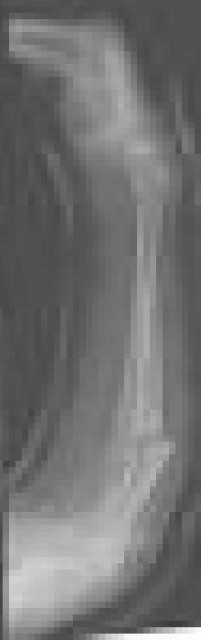

In [7]:
import random
from PIL import Image

random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

Text(0.5, 1.0, 'Image class: Train | Image shape: (640, 201, 3) -> [height, width, color_channels]')

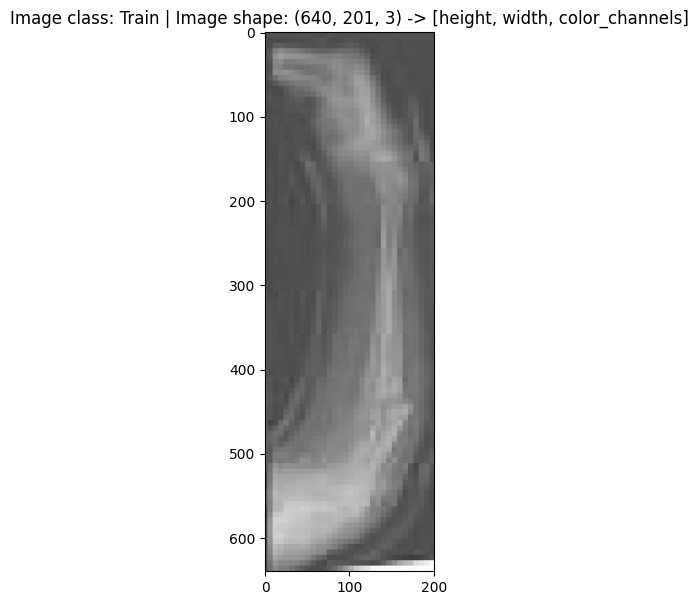

In [8]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")

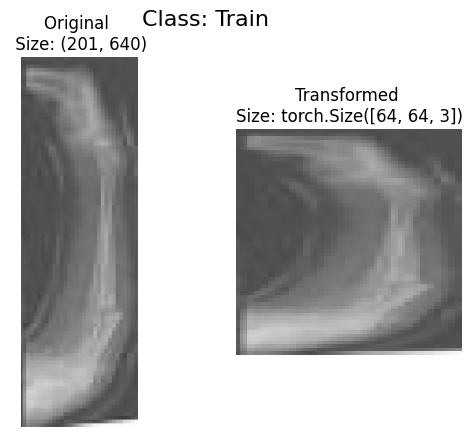

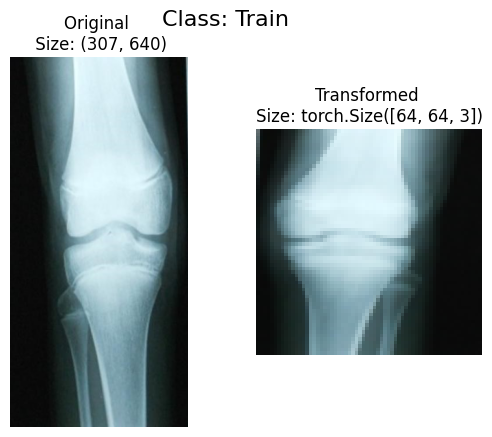

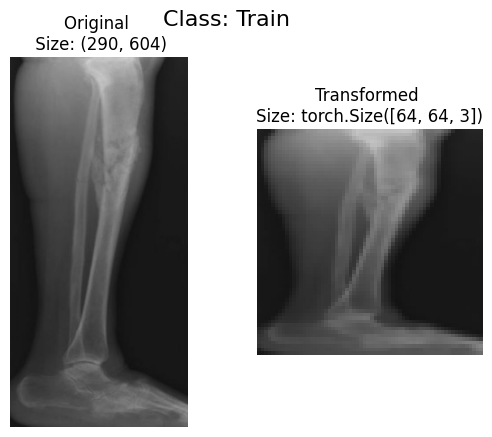

In [9]:
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)

    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \n Size: {f.size}")
            ax[0].axis("off")

            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list,
                        transform=data_transform,
                        n=3)

In [10]:
class_names = train_data.classes
class_names

['Avulsion fracture',
 'Comminuted fracture',
 'Fracture Dislocation',
 'Greenstick fracture',
 'Hairline Fracture',
 'Impacted fracture',
 'Longitudinal fracture',
 'Oblique fracture',
 'Pathological fracture',
 'Spiral Fracture']

In [11]:
class_dict = train_data.class_to_idx
class_dict

{'Avulsion fracture': 0,
 'Comminuted fracture': 1,
 'Fracture Dislocation': 2,
 'Greenstick fracture': 3,
 'Hairline Fracture': 4,
 'Impacted fracture': 5,
 'Longitudinal fracture': 6,
 'Oblique fracture': 7,
 'Pathological fracture': 8,
 'Spiral Fracture': 9}

In [12]:
img, label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n{img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor:
tensor([[[0.4157, 0.3216, 0.3176,  ..., 0.1373, 0.1294, 0.1294],
         [0.3843, 0.2863, 0.2706,  ..., 0.0667, 0.0588, 0.0510],
         [0.4039, 0.3098, 0.2941,  ..., 0.0745, 0.0667, 0.0588],
         ...,
         [0.2627, 0.1608, 0.1647,  ..., 0.2588, 0.2235, 0.1451],
         [0.2667, 0.1647, 0.1686,  ..., 0.2588, 0.2235, 0.1490],
         [0.2627, 0.1608, 0.1647,  ..., 0.2549, 0.2157, 0.1451]],

        [[0.4157, 0.3216, 0.3176,  ..., 0.1373, 0.1294, 0.1294],
         [0.3843, 0.2863, 0.2706,  ..., 0.0667, 0.0588, 0.0510],
         [0.4039, 0.3098, 0.2941,  ..., 0.0745, 0.0667, 0.0588],
         ...,
         [0.2627, 0.1608, 0.1647,  ..., 0.2588, 0.2235, 0.1451],
         [0.2667, 0.1647, 0.1686,  ..., 0.2588, 0.2235, 0.1490],
         [0.2627, 0.1608, 0.1647,  ..., 0.2549, 0.2157, 0.1451]],

        [[0.4157, 0.3216, 0.3176,  ..., 0.1373, 0.1294, 0.1294],
         [0.3843, 0.2863, 0.2706,  ..., 0.0667, 0.0588, 0.0510],
         [0.4039, 0.3098, 0.2941,  ..., 0.07

Original shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3]) -> [height, width, color_channels]


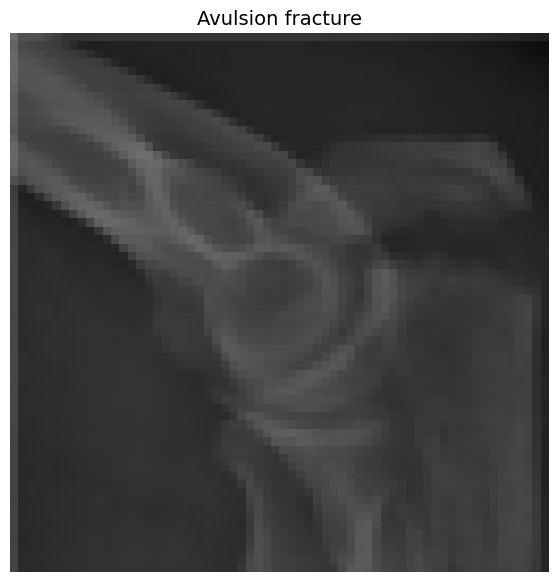

In [13]:
# Rearrange the order of dimensions
img_permute = img.permute(1, 2, 0)

# Print out different shapes (before and after permute)
print(f"Original shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape} -> [height, width, color_channels]")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0))
plt.axis("off")
plt.title(class_names[label], fontsize=14);

In [16]:
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()
print(f"Creating DataLoader's with batch size {BATCH_SIZE} and {NUM_WORKERS} workers.")


Creating DataLoader's with batch size 32 and 4 workers.


In [17]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              num_workers=NUM_WORKERS,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=NUM_WORKERS,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1ce8c9f51d0>,
 <torch.utils.data.dataloader.DataLoader at 0x1ce8eee8090>)

In [18]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


In [19]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [23]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [27]:
class TinyVGG(nn.Module):

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )

        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,               
                      padding=1),
            nn.ReLU(),    
            nn.MaxPool2d(2)
        )

        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape
        ))

    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.classifier(x)
        return x

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                    output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=10, bias=True)
  )
)

In [28]:
img_batch, label_batch = next(iter(train_dataloader))

img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
print(f"Single image shape: {img_single.shape}\n")

model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

print(f"Output logits:\n{pred}\n")
print(f"Output predictions probabilities:\n{torch.softmax(pred, dim=1)}\n")
print(f"Output prediction label:\n{torch.argmax(torch.softmax(pred, dim=1), dim=1)}\n")
print(f"Actual label:\n{label_single}")

Single image shape: torch.Size([1, 3, 64, 64])

Output logits:
tensor([[ 0.0067,  0.0328, -0.0275, -0.0332,  0.0242, -0.0304, -0.0386,  0.0440,
         -0.0603, -0.0254]])

Output predictions probabilities:
tensor([[0.1017, 0.1044, 0.0983, 0.0977, 0.1035, 0.0980, 0.0972, 0.1056, 0.0951,
         0.0985]])

Output prediction label:
tensor([7])

Actual label:
6


In [29]:
try:
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 10]                   --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-8                    [1, 10, 16, 16]           --
├─Sequential: 1-3                        [1, 10]                   --
│    └─Flatten: 2-9                      [1, 2560]                 --
│    └─Linea

In [31]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

    model.train()

    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [32]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

    model.eval()

    test_loss, test_acc = 0, 0

    with torch.inference_mode():

        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)

            test_pred_logits = model(X)

            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [36]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []}

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)

        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn)

        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

In [37]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5

model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)

from timeit import default_timer as timer
start_time = timer()

model_0_results = train(model=model_0,
                       train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                       epochs=NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.2826 | train_acc: 0.1193 | test_loss: 2.3272 | test_acc: 0.1187
Epoch: 2 | train_loss: 2.2693 | train_acc: 0.1446 | test_loss: 2.3278 | test_acc: 0.1250
Epoch: 3 | train_loss: 2.2493 | train_acc: 0.1581 | test_loss: 2.2968 | test_acc: 0.1062
Epoch: 4 | train_loss: 2.2025 | train_acc: 0.2137 | test_loss: 2.2946 | test_acc: 0.1562
Epoch: 5 | train_loss: 2.1678 | train_acc: 0.2276 | test_loss: 2.3387 | test_acc: 0.1583
Total training time: 132.968 seconds
